In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [3]:
storage = {}
disp = [i*250 for i in range(15)]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    theta_rad =  ul.interpnan(df["theta_rad"][idx1-20:idx2+20])
    theta_rad = theta_rad.loc[idx1:idx2].to_numpy() 
    storage[file] = theta_rad
storage = pd.DataFrame(storage)
storage.to_csv(r"D:\PPMI_UA_2021\Database\theta_rad.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


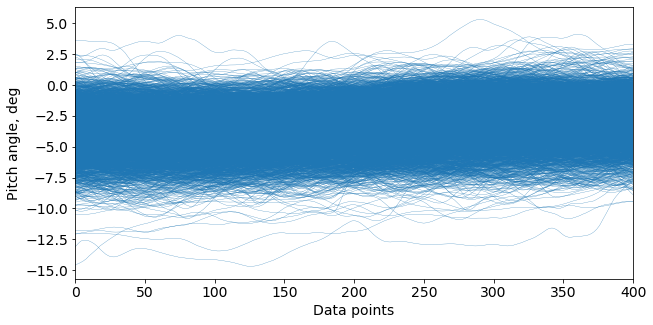

In [2]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\theta_rad.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy() * math.degrees(1), '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Pitch angle, deg", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\theta_rad.png")

In [2]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\theta_rad.csv")
counter, sampling, duration = 0, 16, 5
max_cumsum_deg = 5
theta_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    theta_deg = df[file].to_numpy() * math.degrees(1)
    for irow, _ in enumerate(theta_deg):
        if irow >= theta_deg.shape[0] - sampling * duration:
            theta_flag.append(0)
            break
        else:
            dtheta = theta_deg[irow:irow + sampling * duration]
            cum_dtheta = sum(np.diff(dtheta))
            if cum_dtheta >= max_cumsum_deg:
                theta_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["theta"] = theta_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

  35 ... flight_10499 ... Unstable
  99 ... flight_11417 ... Unstable
 115 ... flight_11538 ... Unstable
 191 ... flight_12793 ... Unstable
 271 ... flight_14232 ... Unstable
 365 ... flight_15522 ... Unstable
 394 ... flight_15844 ... Unstable
 404 ... flight_15966 ... Unstable
 409 ... flight_16060 ... Unstable
 435 ... flight_16626 ... Unstable
 583 ... flight_18787 ... Unstable
 742 ... flight_20469 ... Unstable
 859 ... flight_22171 ... Unstable
 910 ... flight_22792 ... Unstable
 993 ... flight_23928 ... Unstable
1027 ... flight_24306 ... Unstable
1095 ... flight_26735 ... Unstable
1108 ... flight_26894 ... Unstable
1111 ... flight_26940 ... Unstable
1299 ... flight_29989 ... Unstable
1550 ... flight_33161 ... Unstable
1619 ... flight_33957 ... Unstable
1646 ... flight_34126 ... Unstable
1662 ... flight_34364 ... Unstable
1684 ... flight_34572 ... Unstable
1720 ... flight_34981 ... Unstable
1778 ... flight_35867 ... Unstable
1817 ... flight_36745 ... Unstable
1837 ... flight_3699

In [7]:
flag = sop_criteria.gamma + sop_criteria.track + sop_criteria.theta 

In [9]:
y = sum(flag > 0)
y

268

In [11]:
y = sum(flag == 1)
y

240

In [12]:
y = sum(flag == 2)
y

27

In [13]:
y = sum(flag == 3)
y

1

In [3]:
counter

59